In [1]:
import sys
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, '..')

from plotting import default_plot

In [2]:
df = pd.read_csv(f'../MetroPT2.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.reset_index(drop=True, inplace=True)

plt.rcParams.update({'date.autoformatter.hour': '%m-%d %H:00'})

# Load data 
with open('../data/pt2_test_chunk_dates.pkl', 'rb') as f:
    test_chunk_dates = pickle.load(f)


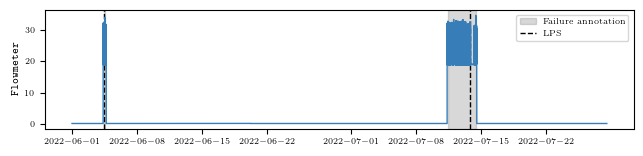

In [7]:
fig, axs = default_plot(width_fraction=2, height_fraction=0.4)
axs.set_ylabel(r'\texttt{Flowmeter}')
# Plot failure one - air pressure
axs.axvspan(xmin=np.datetime64('2022-06-04T10:19:24.300000000'), xmax=np.datetime64('2022-06-04T14:22:39.188000000'), color='gray', alpha=0.3, label='Failure annotation')
axs.axvline(x=np.datetime64('2022-06-04T11:26:01.422000000'), color='black', linestyle='--', label='LPS')
# Plot failure two - oil leak
axs.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
axs.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')

#axs.plot(df.timestamp[df.timestamp <= '2022-06-01T00:00:00'], df['Flowmeter'][df.timestamp <= '2022-06-01T00:00:00'], color='blue', label='train')
axs.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Flowmeter'][df.timestamp > '2022-06-01T00:00:00'], color='C1')
fig.legend(bbox_to_anchor=(0.98,0.92))
fig.tight_layout()
fig.savefig('../plots/flowmeter.pdf', transparent=True)

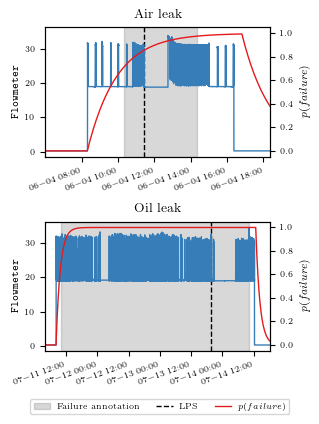

In [6]:
p_failure = np.load('../data/pt2_waenogan_output.npy')
rot = 20
c_flowmeter = 'C1'
c_p = 'C0'
fig, axs = default_plot(subplots=(2, 1), sharey=True, sharex=False, height_fraction=1)
axs[0].set_ylabel(r'\texttt{Flowmeter}')
axs[1].set_ylabel(r'\texttt{Flowmeter}')

# Plot failure one - air pressure
axs[0].axvspan(xmin=np.datetime64('2022-06-04T10:19:24.300000000'), xmax=np.datetime64('2022-06-04T14:22:39.188000000'), color='gray', alpha=0.3, label='Failure annotation')
axs[0].axvline(x=np.datetime64('2022-06-04T11:26:01.422000000'), color='black', linestyle='--', label='LPS')

axs[0].plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Flowmeter'][df.timestamp > '2022-06-01T00:00:00'], color=c_flowmeter)
axs[0].set_xlim(np.datetime64('2022-06-04T06:00:00.300000000'), np.datetime64('2022-06-04T18:22:39.188000000'))
#axs[0].set_xticks([])
axs[0].set_title('Air leak')
axs[0].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=rot, ha='right')

ax2 = axs[0].twinx() 
ax2.set_ylabel(r'$p(failure)$') 
ax2.plot(test_chunk_dates[:, 1], p_failure, color=c_p, label=r'$p(failure)$')


axs[1].axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
axs[1].axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
axs[1].plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Flowmeter'][df.timestamp > '2022-06-01T00:00:00'], color=c_flowmeter)
axs[1].set_xlim(np.datetime64('2022-07-11T04:00:00.300000000'), np.datetime64('2022-07-14T18:22:39.188000000'))
#axs[1].set_xticks([])
axs[1].set_title('Oil leak')
axs[1].set_xticks(axs[1].get_xticks(), axs[1].get_xticklabels(), rotation=rot, ha='right')

ax2 = axs[1].twinx() 
ax2.set_ylabel(r'$p(failure)$') 
ax2.plot(test_chunk_dates[:, 1], p_failure, color=c_p)

#fig.autofmt_xdate(rotation=45)
#fig.legend(ncols=3, bbox_to_anchor=(0.1, 1), loc='lower left')
fig.legend(ncols=3, bbox_to_anchor=(0.5, -0.05), loc='lower center')
fig.tight_layout()
fig.savefig('../plots/flowmeter_combined.pdf', transparent=True, bbox_inches='tight')

In [5]:
plt.figure(figsize=(0.5*width, 0.5*width * 1/2))
plt.ylabel('Flowmeter')
# Plot failure one - air pressure
# Plot failure two - oil leak
plt.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
plt.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Flowmeter'][df.timestamp > '2022-06-01T00:00:00'], color='green')
plt.xlim(np.datetime64('2022-07-11T04:00:00.300000000'), np.datetime64('2022-07-14T18:22:39.188000000'))
plt.xticks([])
plt.title('Failure Two')
plt.tight_layout()
plt.savefig('plots/flowmeter_f2.pdf', transparent=True)

NameError: name 'width' is not defined

/tmp/ipykernel_3837993/2651486.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('plots/oil.pdf', transparent=True)
/tmp/ipykernel_3837993/2651486.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('plots/oil.pdf', transparent=True)
/home/jakobs/metro-xai/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


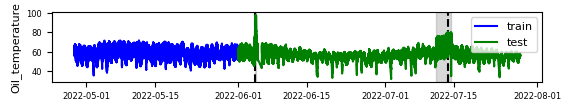

In [ ]:
plt.figure(figsize=(width, width * 1/5))
plt.ylabel('Oil_temperature')
# Plot failure one - air pressure
plt.axvspan(xmin=np.datetime64('2022-06-04T10:19:24.300000000'), xmax=np.datetime64('2022-06-04T14:22:39.188000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-06-04T11:26:01.422000000'), color='black', linestyle='--')
# Plot failure two - oil leak
plt.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
plt.plot(df.timestamp[df.timestamp <= '2022-06-01T00:00:00'], df['Oil_temperature'][df.timestamp <= '2022-06-01T00:00:00'], color='blue', label='train')
plt.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Oil_temperature'][df.timestamp > '2022-06-01T00:00:00'], color='green', label='test')
plt.legend()
plt.tight_layout()
plt.savefig('plots/oil.pdf', transparent=True)

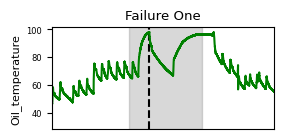

In [ ]:
plt.figure(figsize=(0.5*width, 0.5*width * 1/2))
plt.ylabel('Oil_temperature')
# Plot failure one - air pressure
plt.axvspan(xmin=np.datetime64('2022-06-04T10:19:24.300000000'), xmax=np.datetime64('2022-06-04T14:22:39.188000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-06-04T11:26:01.422000000'), color='black', linestyle='--')
# Plot failure two - oil leak
plt.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
plt.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Oil_temperature'][df.timestamp > '2022-06-01T00:00:00'], color='green')
plt.xlim(np.datetime64('2022-06-04T06:00:00.300000000'), np.datetime64('2022-06-04T18:22:39.188000000'))
plt.xticks([])
plt.title('Failure One')
plt.tight_layout()
plt.savefig('plots/oil_f1.pdf', transparent=True)

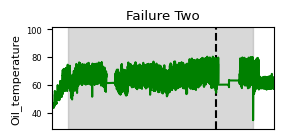

In [ ]:
plt.figure(figsize=(0.5*width, 0.5*width * 1/2))
plt.ylabel('Oil_temperature')
# Plot failure one - air pressure
# Plot failure two - oil leak
plt.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
plt.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Oil_temperature'][df.timestamp > '2022-06-01T00:00:00'], color='green')
plt.xlim(np.datetime64('2022-07-11T04:00:00.300000000'), np.datetime64('2022-07-14T18:22:39.188000000'))
plt.xticks([])
plt.title('Failure Two')
plt.tight_layout()
plt.savefig('plots/oil_f2.pdf', transparent=True)